In [91]:
%pwd

'C:\\Users\\User\\Desktop\\boot camp\\파이썬 기초\\data'

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [175]:
%cd C:\\Users\\User\\Desktop\\boot camp\\파이썬 기초\\data

C:\Users\User\Desktop\boot camp\파이썬 기초\data


In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

NanumBarunGothic
NanumSquareOTF
NanumBarunpen
NanumMyeongjo Eco
NanumSquare Neo ExtraBold
NanumBarunGothic
NanumGothic
NanumGothic Eco
NanumSquareOTF_ac
NanumSquareOTF_ac
NanumSquareOTF
NanumMyeongjo
NanumSquareOTF_ac
NanumGothic
NanumSquare
NanumBarunGothicOTF
NanumSquare Neo Regular
D2Coding ligature
NanumSquareRoundOTF
NanumMyeongjo YetHangul
NanumGothic Eco
NanumMyeongjoOTF YetHangul
NanumBarunGothicOTF
NanumSquareOTF
NanumSquare Neo OTF Regular
NanumSquareOTF
NanumMyeongjo Eco
NanumMyeongjoOTF Eco
Noto Sans KR
NanumSquare_ac
NanumMyeongjoOTF
NanumBarunpenOTF
NanumMyeongjoOTF
Nanum Pen Script
NanumSquare_ac
NanumSquare Neo Light
NanumGothic Eco
NanumSquare
NanumMyeongjo
NanumBarunGothicOTF
NanumGothicOTF
NanumBarunpenOTF
NanumBarunpen
NanumSquareRound
NanumGothicOTF
Nanum Brush Script OTF
NanumSquareRound
NanumSquare_ac
NanumMyeongjoOTF Eco
NanumSquare
NanumBarunGothic YetHangul
NanumSquareRound
NanumSquareRoundOTF
NanumSquare Neo OTF Heavy
NanumSquareOTF_ac
NanumBarunGothic
NanumB

In [95]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


---------------------------------------------------------------------------------

In [176]:
df = pd.read_csv('survey_results_public.csv',index_col='ResponseId')
df2 = pd.read_csv('survey_results_schema.csv',index_col='qname')['question']

In [7]:
df.head(3)
df2.head(3)

qname
S0          <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                    Browser Meta Info
S1          <span style="font-size:22px; font-family: aria...
Name: question, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [19]:
pd.set_option('display.max_columns',78) # 전체 컬럼을 볼 수 있게 설정
pd.set_option('display.max_rows',78) # row 78개까지 볼 수 있게 설정

In [27]:
selected_columns=[
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    'Employment',
    'DevType',
    'WorkExp'
]
df = df[selected_columns].copy() # 원하는 칼럼만 가지고옴 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [47]:
df2['YearsCode']

AttributeError: 'str' object has no attribute 'isnull'

## 연습문제

In [46]:
# 내 풀이
def count_nan(Series):
    return Series.isnull().sum()

count_nan(df2)

0

In [50]:
# 해답 풀이
def count_nan(Series):
    return len(Series) - Series.count()

count_nan(df['YearsCode'])

1937

## 연습문제

In [52]:
df['YearsCode'] = df['YearsCode'].replace('Less than 1 year',0,inplace=True)
df['YearsCode'] = df['YearsCode'].replace('More than 50 year',51,inplace=True)
df['YearsCode'] = df['YearsCode'].astype('float')


ResponseId
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
73264   NaN
73265   NaN
73266   NaN
73267   NaN
73268   NaN
Name: YearsCode, Length: 73268, dtype: float64

In [53]:
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year',0,inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 year',51,inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype('float')


## numeric method

In [57]:
df['YearsCord'] = pd.to_numeric(df.YearsCode , errors='coerce')
df['YearsCordPro'] = pd.to_numeric(df.YearsCodePro , errors='coerce')
# 숫자로 바꿀 수 없는 값을 NAN으로 처리하고 수치 자료형으로 바꿔줌

## where 활용

In [61]:
df.where(~(df['Gender'].str.contains(';',na=False)),np.nan,inplace = True)
# ; 를 포함하는 (여러 선택한 사람) row를 NAN값으로 변경 (where를 이용해 False이면 nan으로 변경)

In [62]:
df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [74]:
sns.set_style('darkgrid')
mpl.rcParams['font.size']=14
mpl.rcParams['figure.figsize']=(9,5)
mpl.rcParams['figure.facecolor'] = 'ff0000' # 검정색(f 6개는 흰색)
mpl.rcParams['axes.facecolor'] = 'white'

In [76]:
print(plt.style.available)
# matplotlib.pyplot에 style을 적용할 수 있는 것들에 대한 리스트 조회

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


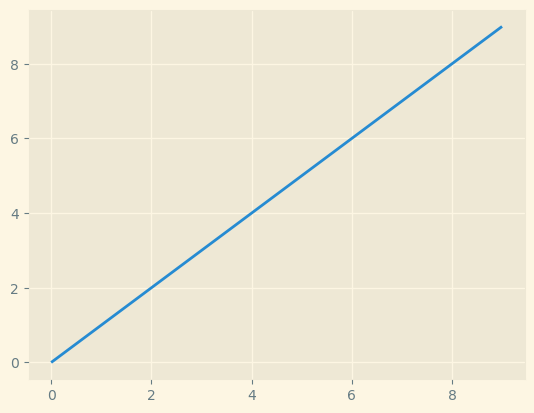

In [77]:
plt.style.use('default') # 기본 스타일로 초기화
plt.style.use('Solarize_Light2') # 스타일 적용
plt.plot(range(10))
plt.show()

## 연습문제

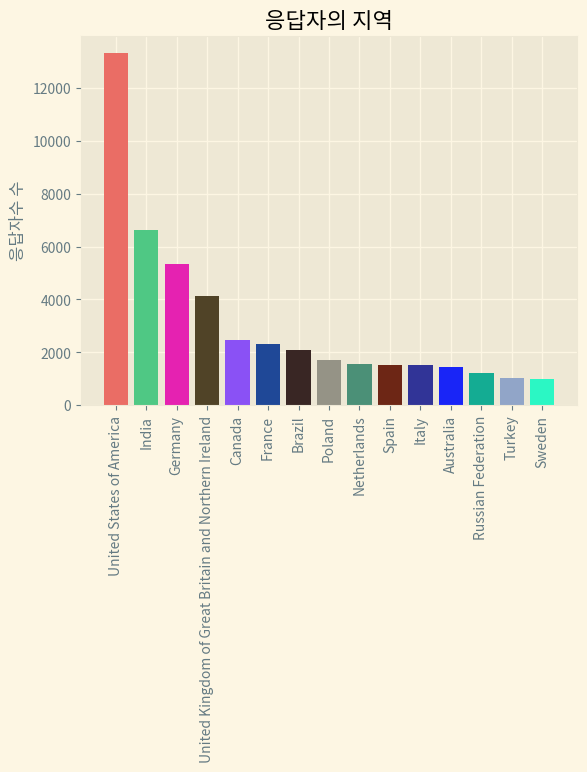

In [124]:
mpl.rcParams['font.family'] = 'Noto Sans KR' # 한글
top = df['Country'].value_counts().head(15)

x = top.index
y = top
color = np.random.rand(len(x),3)

plt.xticks(rotation=90)
plt.title('응답자의 지역')
plt.ylabel('응답자수 수')
plt.bar(x,y,color=color)
plt.show()

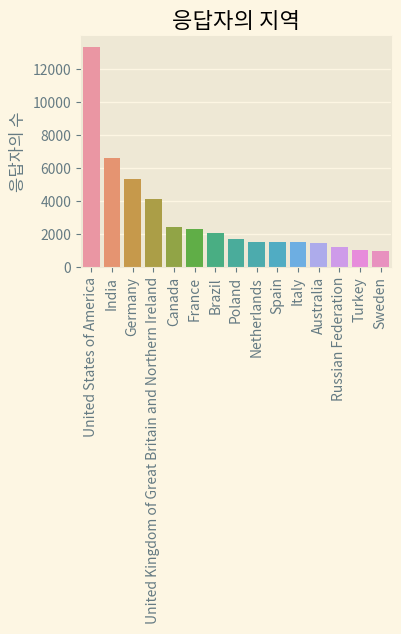

In [128]:
## 방법 2
plt.figure(figsize=(4,3))
plt.title('응답자의 지역')
plt.xticks(rotation=90)
sns.barplot(x=top.index,y=top)
plt.ylabel('응답자의 수')
plt.show()

In [129]:
count_nan(df['Age'])  # NaN의 개수

3011

In [130]:
df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [132]:
df['Age'].nunique()

8

In [140]:
x= df['Age'].value_counts().index
y = df['Age'].value_counts()

## 연습문제 

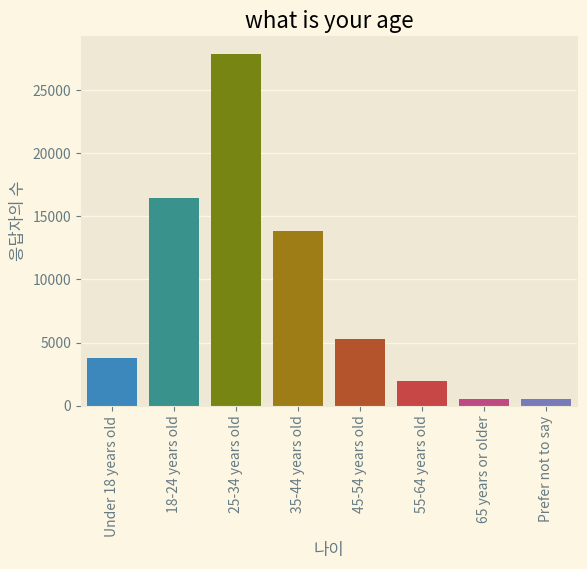

In [147]:
age_order = ['Under 18 years old','18-24 years old','25-34 years old',
              '35-44 years old','45-54 years old','55-64 years old',
             '65 years or older','Prefer not to say']
color = np.random.rand(len(x),3)


plt.title('what is your age')
plt.xticks(rotation=90)
sns.barplot(x=x,y=y,order=age_order)
plt.ylabel('응답자의 수')
plt.xlabel('나이')
plt.show()

In [149]:
df['Gender'].value_counts(True) # True를 넣으면 옵션을 줌 

Man                                                  0.920839
Woman                                                0.048446
Prefer not to say                                    0.016704
Non-binary, genderqueer, or gender non-conforming    0.010034
Or, in your own words:                               0.003977
Name: Gender, dtype: float64

## 연습문제

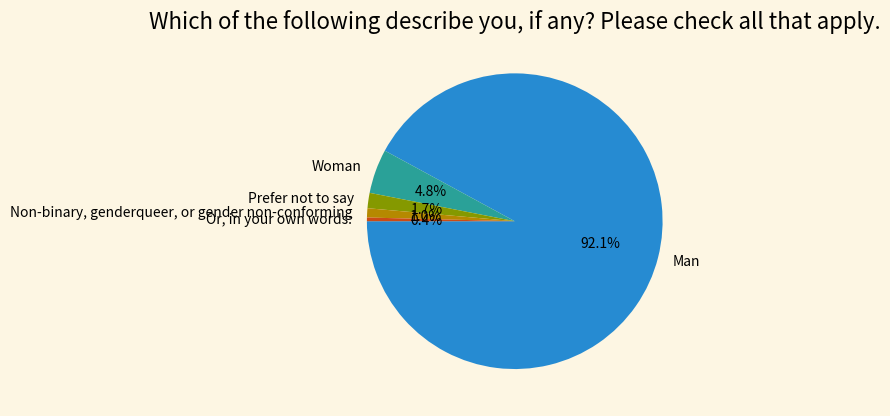

In [161]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%',startangle=180)
plt.title(df2['Gender'])
plt.show()

In [ ]:
# 연습문제 해답
plt.figure(figsize=(6, 6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180,
        labeldistance=1.5, pctdistance=1.2, rotatelabels=True)
# labeldistance: label의 pie 차트 중심으로부터의 거리
# pctdistance: 값의 pie 차트 중심으로부터의 거리
# rotatelabels: True일 때 label을 회전시켜서 출력합니다.
plt.show()

In [182]:
df2['EdLevel']
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

## 연습문제

In [218]:
k = df['EdLevel'].value_counts(True)  # x label 비율로 나타내려면 True옵션
k

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.423020
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.216373
Some college/university study without earning a degree                                0.130304
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.110436
Associate degree (A.A., A.S., etc.)                                                   0.031242
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.030306
Primary/elementary school                                                             0.025234
Something else                                                                        0.017423
Professional degree (JD, MD, etc.)                                                    0.015663
Name: EdLevel, dtype: float64

Text(0.5, 1.0, 'Which of the following best describes the highest level of formal education that you’ve completed? *')

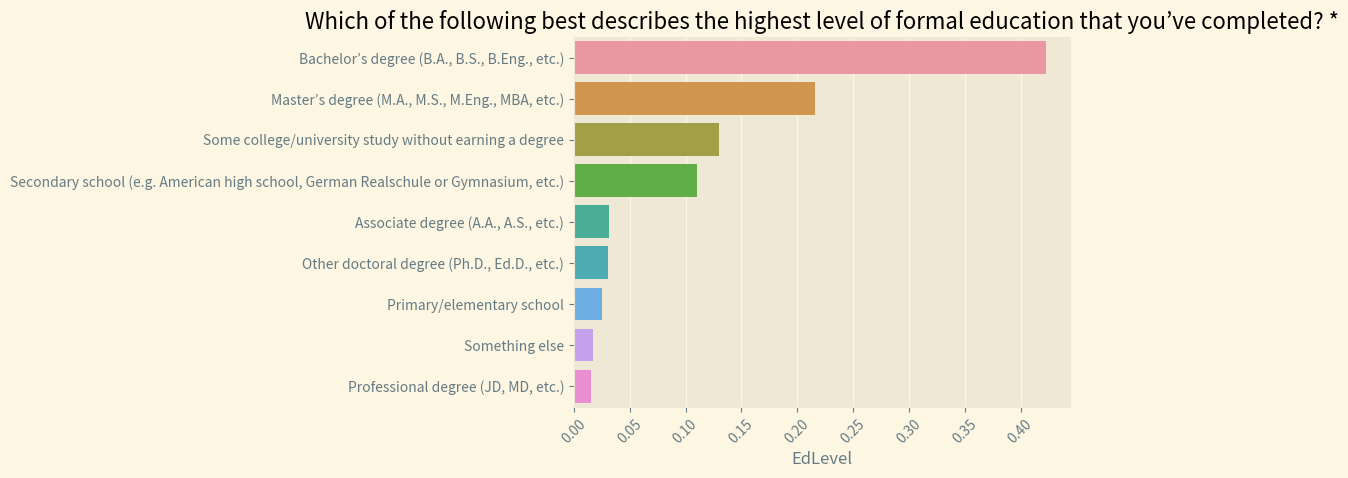

In [219]:
sns.barplot(x=k , y=k.index) 
plt.xticks(rotation=45)
plt.ylabel('')
plt.title(df2['EdLevel'])

## 연습문제

Text(0.5, 0, 'percentage')

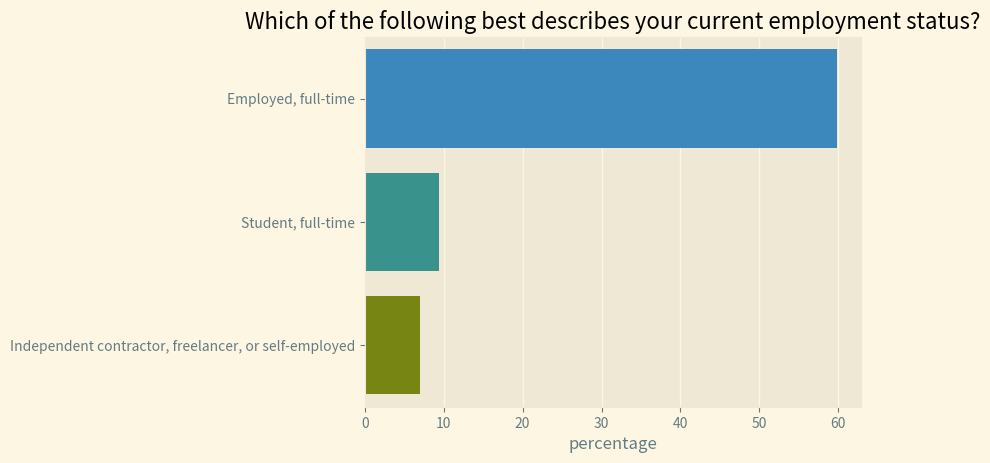

In [224]:
k2 = (df['Employment'].value_counts(True,ascending=False)*100).head(3)
sns.barplot(x=k2,y=k2.index)
plt.title(df2['Employment'])
plt.xlabel('percentage')

## 연습문제(가장 고난이도)

In [246]:
def split_multicolumn(s):
    s.dropna(inplace=True) # 일
    df = pd.DataFrame(s)
    for x in s.str.split(';').items():
        for y in x[1]:
            df.loc[x[0],y]=True
    df.fillna(False,inplace=True)
    return df
    
split_multicolumn(df.DevType)

,DevType,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,Data scientist or machine learning specialist;...,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,"Developer, full-stack",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,"Developer, front-end;Developer, full-stack;Dev...",False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Developer, full-stack;Student",False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,Data scientist or machine learning specialist,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,"Developer, full-stack;Developer, desktop or en...",False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
